In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('dataset_small/ratings.csv')

X = data[['movieId', 'userId']]
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

scalers = {
    'without_scaler': None,
    'min_max': MinMaxScaler(),
    'z-score': StandardScaler()
}

regressors = {
  'knn': KNeighborsRegressor(n_neighbors=15),
  'decicion_tree': DecisionTreeRegressor(),
  'linear_regression': LinearRegression(),
  'random_forest': RandomForestRegressor(),
  'neural_network_mlp': MLPRegressor()
}

### KNN

In [2]:
n_neighbors =  [5, 7, 9, 11, 13, 15]
weights = ['distance', 'uniform']

dataframe_mse = {}
dataframe_mae = {}

for num in n_neighbors:
    for weight in weights:
        for scaler in scalers:
            if(scalers[scaler] == None):
                pipe = Pipeline([('regressor', KNeighborsRegressor(num, weights=weight))])
            else:
                pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', KNeighborsRegressor(num, weights=weight))])
            
            pipe.fit(X_train, y_train)
            y_predict = pipe.predict(X_test)
            
            mse = mean_squared_error(y_test, y_predict)
            mae = mean_absolute_error(y_test, y_predict)
            
            key = f'k_{num}-{weight}'

            if key in dataframe_mse:
                dataframe_mse[key].append(mse)
                dataframe_mae[key].append(mae)
            else:
                dataframe_mse[key] = [mse]
                dataframe_mae[key] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
k_5-distance,1.185152,1.120397,1.126983
k_5-uniform,1.153628,1.022032,1.035985
k_7-distance,1.135494,1.080950,1.086787
k_7-uniform,1.108091,0.982236,0.995128
k_9-distance,1.109340,1.057180,1.062529
k_9-uniform,1.088864,0.963290,0.975674
k_11-distance,1.092749,1.042386,1.047591
k_11-uniform,1.078093,0.954558,0.968088
k_13-distance,1.080038,1.031748,1.036819
k_13-uniform,1.070026,0.950328,0.965053


'MAE'

,without-scaler,min-max,z-score
k_5-distance,0.849012,0.812053,0.815807
k_5-uniform,0.841021,0.781665,0.788424
k_7-distance,0.832899,0.799255,0.802410
k_7-uniform,0.827149,0.768677,0.774398
k_9-distance,0.824076,0.790847,0.793895
k_9-uniform,0.820813,0.761521,0.766906
k_11-distance,0.818632,0.785705,0.788764
k_11-uniform,0.817189,0.758051,0.764381
k_13-distance,0.814128,0.782251,0.785224
k_13-uniform,0.814279,0.756819,0.763942


### Regressão Linear

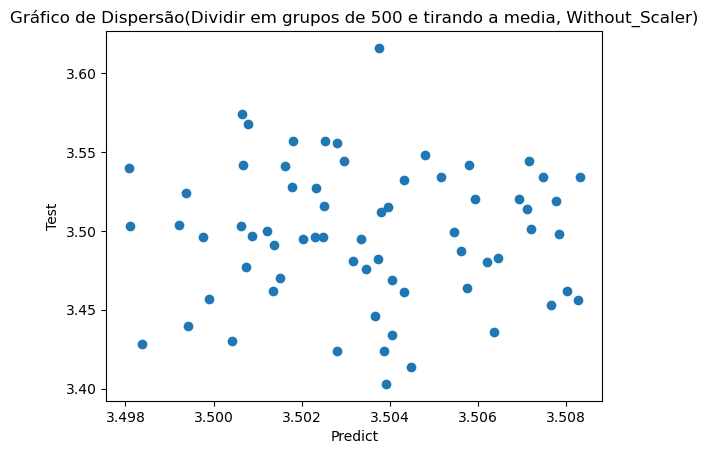

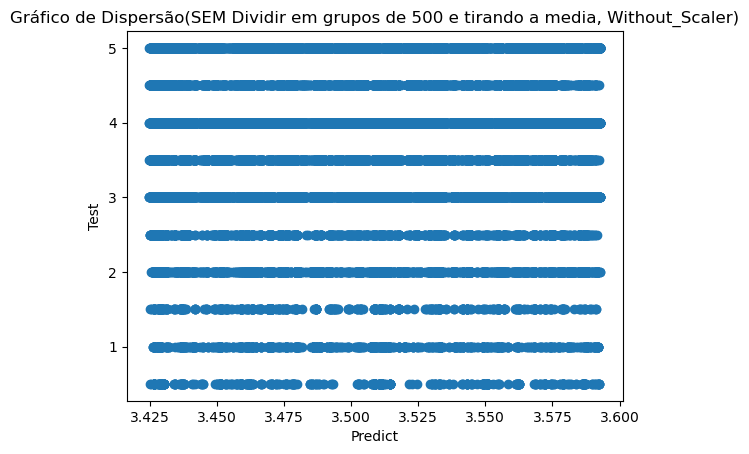

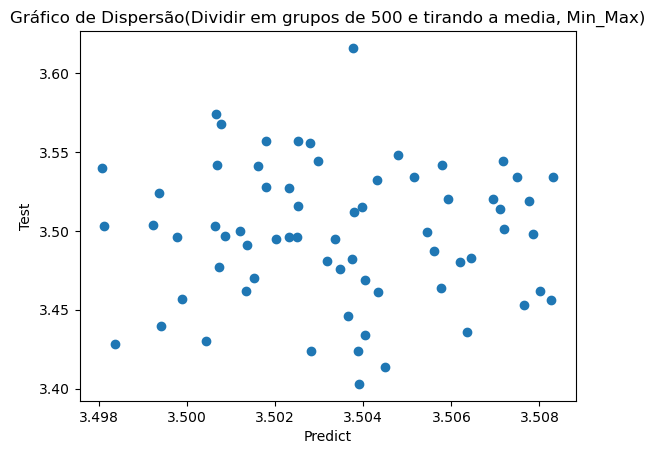

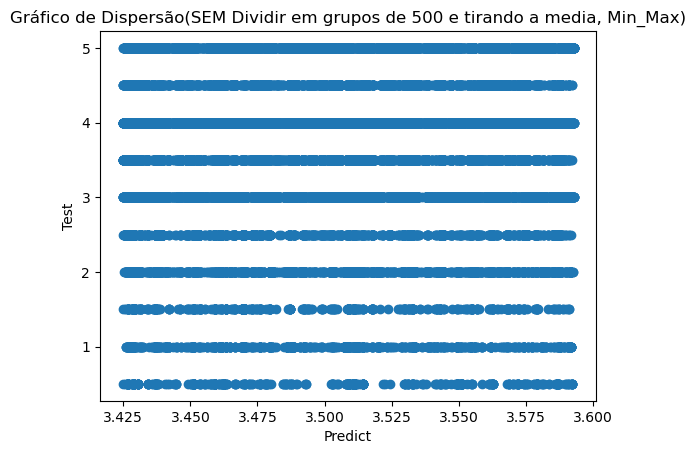

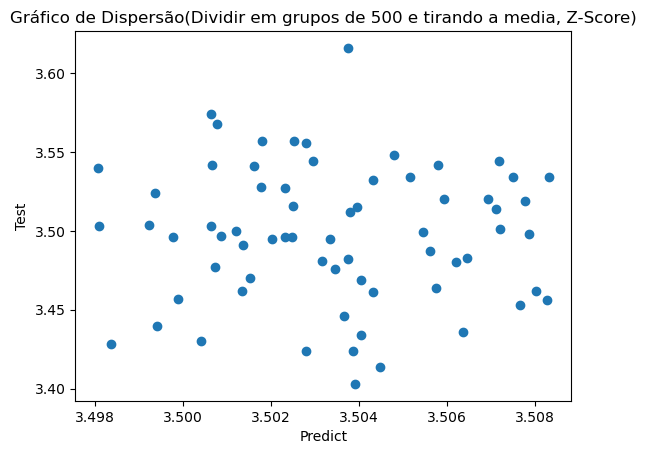

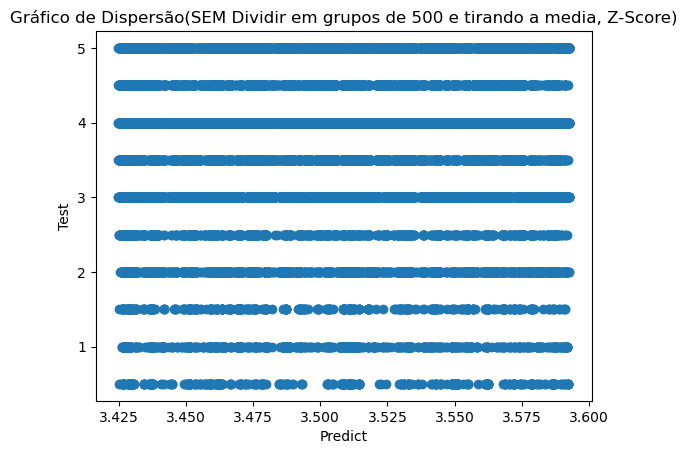

'MSE'

,without-scaler,min-max,z-score
metric,1.098445,1.098445,1.098445


'MAE'

,without-scaler,min-max,z-score
metric,0.835127,0.835127,0.835127


'R2'

,without-scaler,min-max,z-score
metric,0.002644,0.002644,0.002644


In [2]:
dataframe_mse = {}
dataframe_mae = {}
dataframe_r2 = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', LinearRegression())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', LinearRegression())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
        dataframe_r2[key].append(r2)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]
        dataframe_r2[key] = [r2]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
r2_df = pd.DataFrame.from_dict(dataframe_r2, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)
display('R2', r2_df)

### Árvore de Decisão

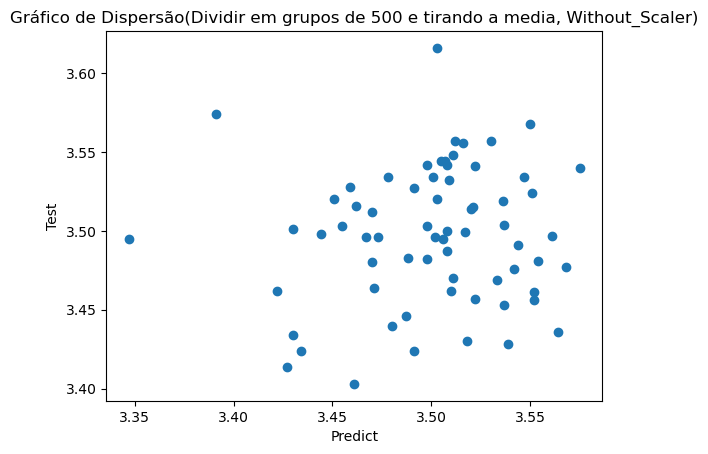

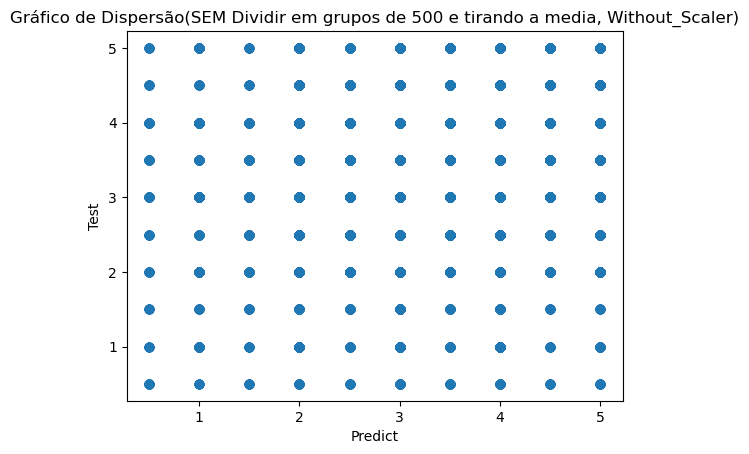

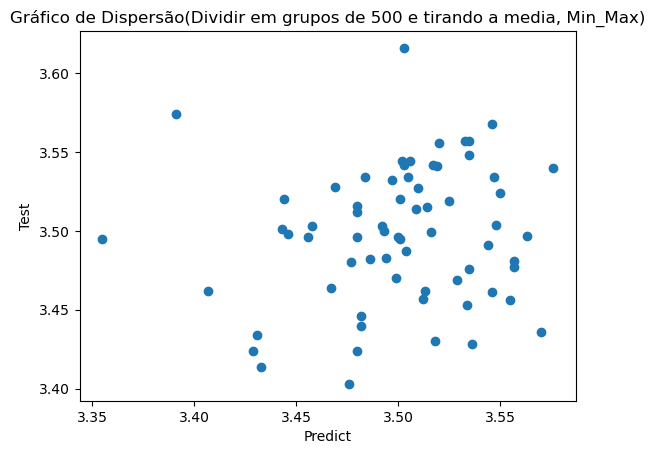

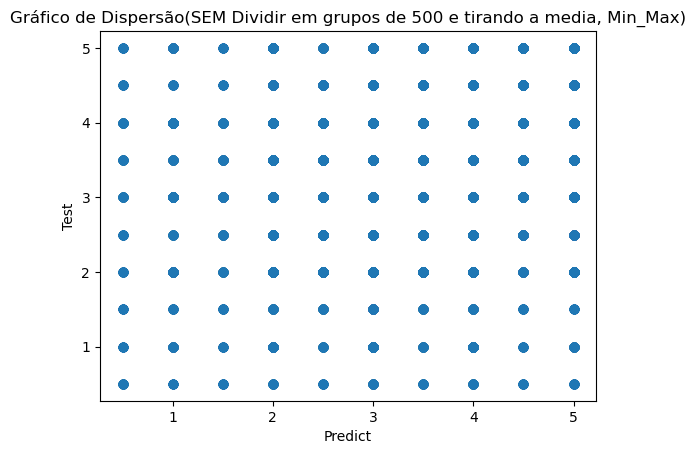

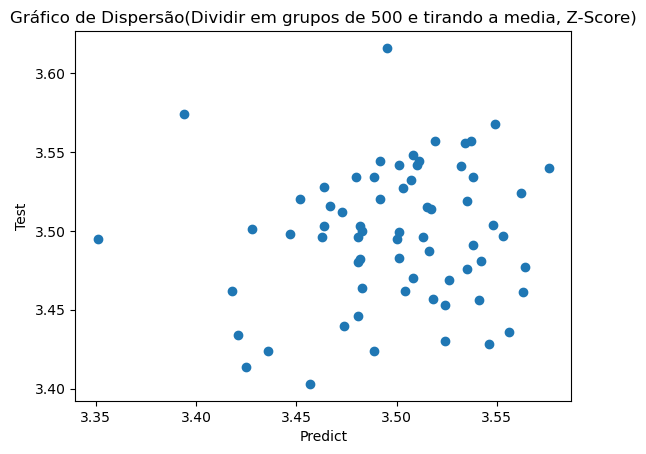

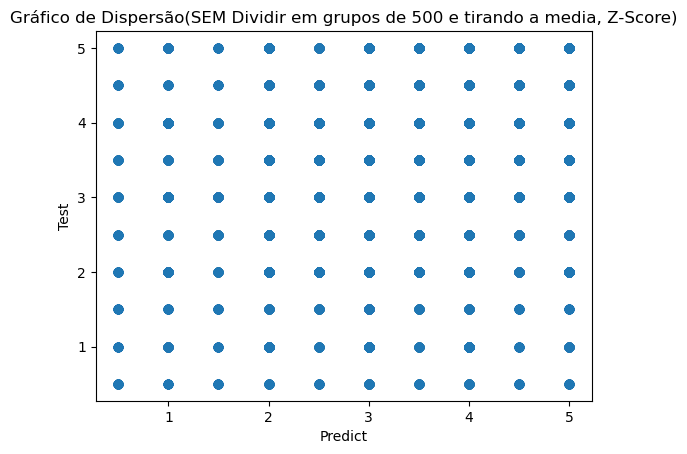

'MSE'

,without-scaler,min-max,z-score
metric,1.644909,1.645766,1.643181


'MAE'

,without-scaler,min-max,z-score
metric,0.950896,0.951767,0.950264


In [3]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', DecisionTreeRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', DecisionTreeRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

### Random Forest

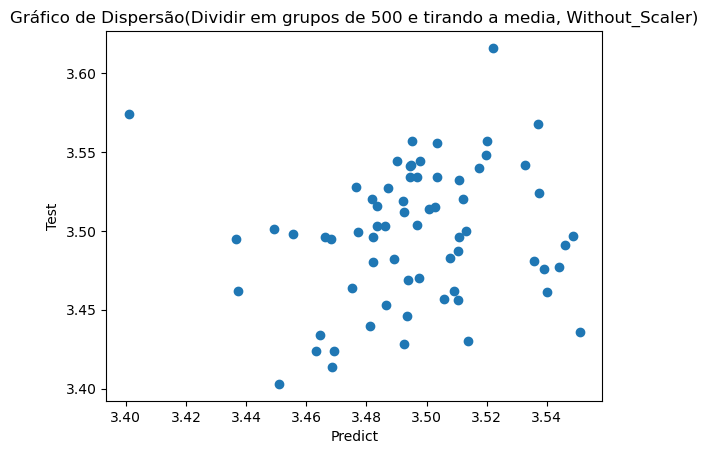

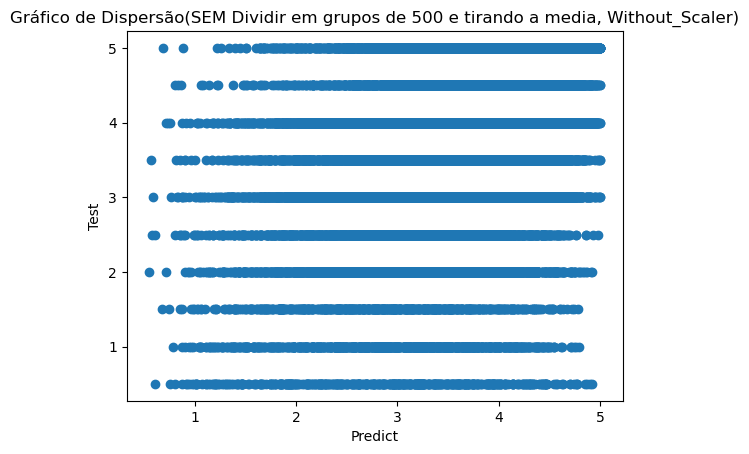

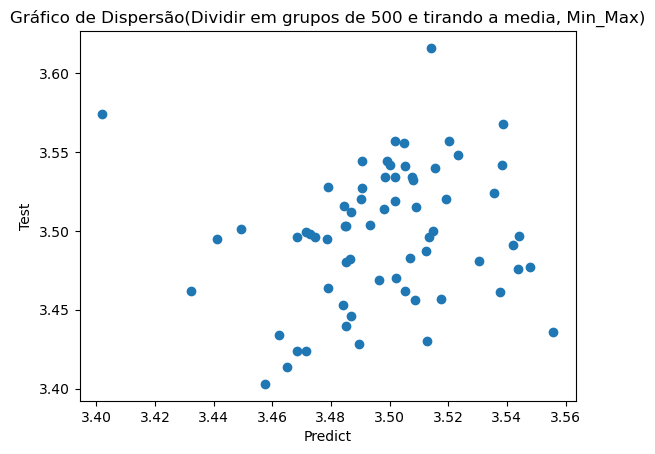

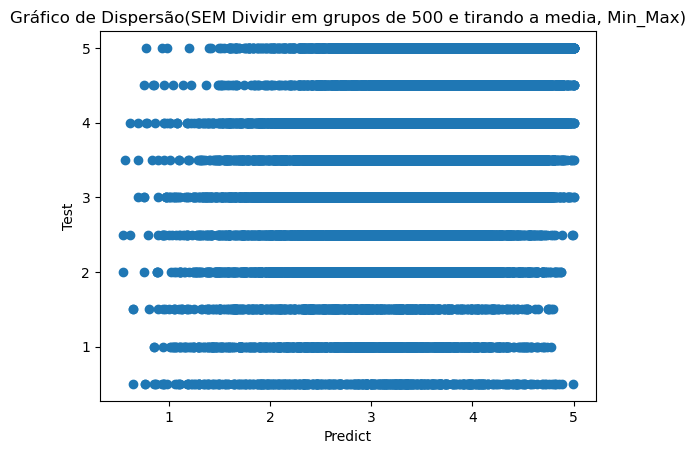

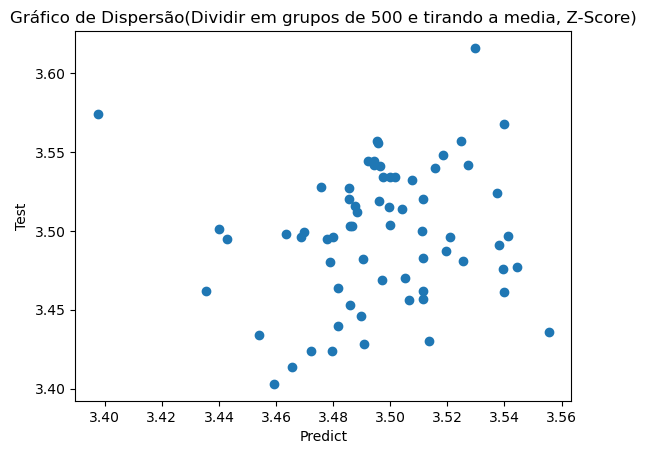

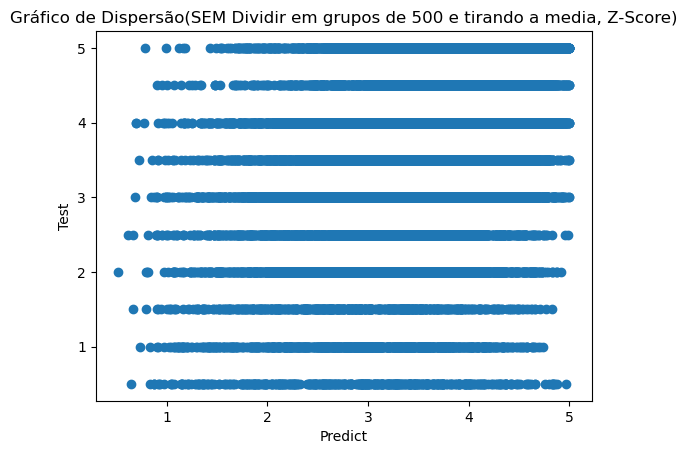

'MSE'

,without-scaler,min-max,z-score
metric,1.096713,1.098029,1.096121


'MAE'

,without-scaler,min-max,z-score
metric,0.805132,0.806177,0.804992


In [4]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', RandomForestRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', RandomForestRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

### Rede Neural MLP

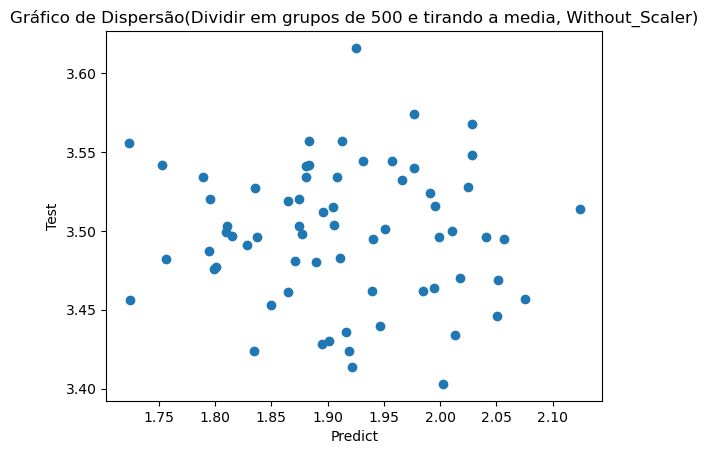

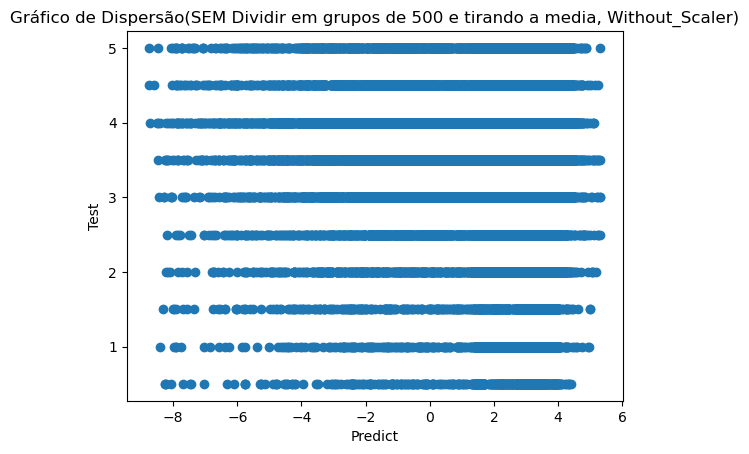

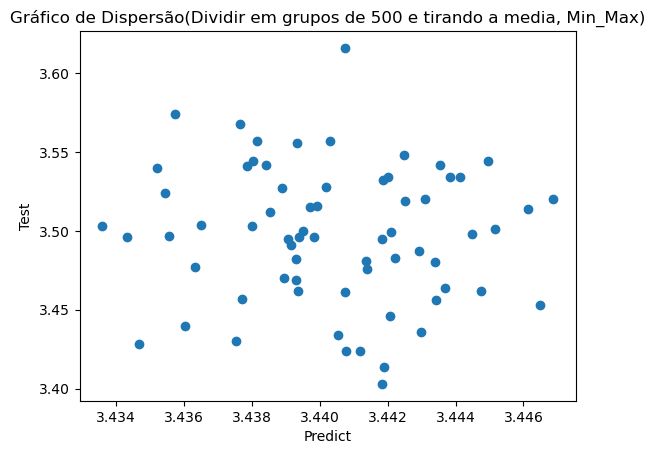

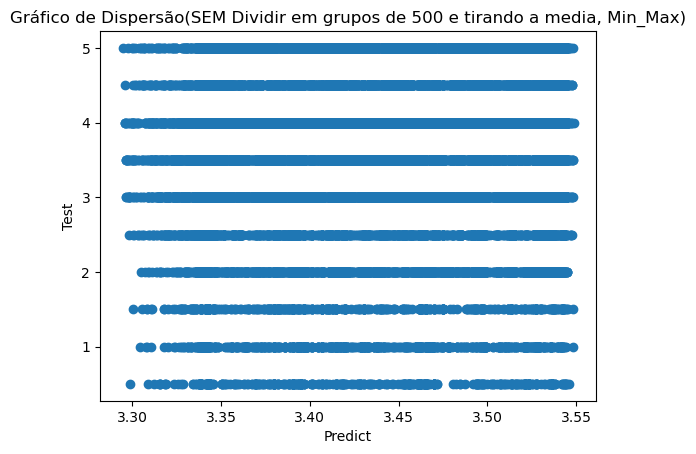

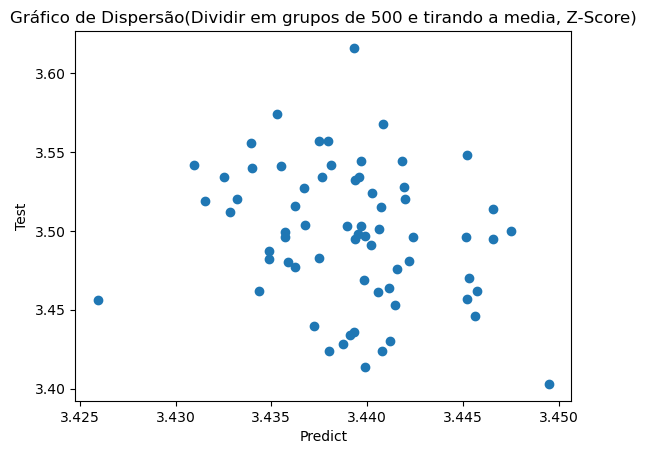

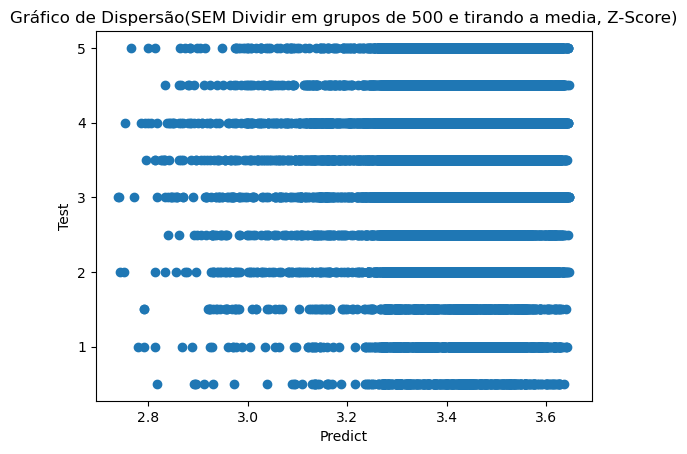

'MSE'

,without-scaler,min-max,z-score
metric,8.440371,1.100269,1.09753


'MAE'

,without-scaler,min-max,z-score
metric,2.021334,0.84382,0.845218


In [5]:
dataframe_mse = {}
dataframe_mae = {}

for scaler in scalers:
    if(scalers[scaler] == None):
        pipe = Pipeline([('regressor', MLPRegressor())])
    else:
        pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', MLPRegressor())])
    
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)

    key = f'metric'

    if key in dataframe_mse:
        dataframe_mse[key].append(mse)
        dataframe_mae[key].append(mae)
    else:
        dataframe_mse[key] = [mse]
        dataframe_mae[key] = [mae]

    y_test_media = []
    y_predict_media = []
    tamanhoGrupo = 500
    for i in range(0, len(y_test), tamanhoGrupo):
        y_predict_media.append(np.mean(y_predict[i:i + tamanhoGrupo]))
        y_test_media.append(np.mean(y_test[i:i + tamanhoGrupo]))

    plt.scatter(y_predict_media, y_test_media)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

    plt.scatter(y_predict, y_test)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.title(
        f"Gráfico de Dispersão(SEM Dividir em grupos de 500 e tirando a media, {scaler.title()})")
    plt.show()

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

### Comparação entre métodos

In [7]:
dataframe_mse = {}
dataframe_mae = {}

for regressor in regressors:
  for scaler in scalers:
    if(scalers[scaler] == None):
      pipe = Pipeline([('regressor', regressors[regressor])])
    else:
      pipe = Pipeline([(scaler, scalers[scaler]), ('regressor', regressors[regressor])])
      
    pipe.fit(X_train, y_train)
    y_predict = pipe.predict(X_test)
    
    mse = mean_squared_error(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)

    if regressor in dataframe_mse:
        dataframe_mse[regressor].append(mse)
        dataframe_mae[regressor].append(mae)
    else:
        dataframe_mse[regressor] = [mse]
        dataframe_mae[regressor] = [mae]

mse_df = pd.DataFrame.from_dict(dataframe_mse, orient='index', columns=['without-scaler', 'min-max', 'z-score'])
mae_df = pd.DataFrame.from_dict(dataframe_mae, orient='index', columns=['without-scaler', 'min-max', 'z-score'])

display('MSE', mse_df)
display('MAE', mae_df)

'MSE'

,without-scaler,min-max,z-score
knn,1.065455,0.946099,0.962343
decicion_tree,1.646863,1.645097,1.648057
linear_regression,1.098445,1.098445,1.098445
random_forest,1.098046,1.098710,1.096222
neural_network_mlp,79.828442,1.091346,1.087861


'MAE'

,without-scaler,min-max,z-score
knn,0.812839,0.755885,0.763773
decicion_tree,0.950835,0.950941,0.951361
linear_regression,0.835127,0.835127,0.835127
random_forest,0.805823,0.806163,0.804889
neural_network_mlp,4.869524,0.836406,0.833862
